In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline


def srednia(tablica: (list | pd.Series)) -> (int | float):
    return sum(tablica)/len(tablica)


def odchylenie_standardowe(tablica: (list | pd.Series)) -> (int | float):
    tablica = list(
        map((lambda element: (element - srednia(tablica))**2), tablica))
    return (sum(tablica)/len(tablica)) ** (1/2)


def kowariancja(tablica1: (list | pd.Series), tablica2: (list | pd.Series)) -> (int | float):
    iloczyn_elementow = zip(tablica1, tablica2)
    srednia_iloczynu = sum(list(
        map(lambda element: element[0] * element[1], iloczyn_elementow))) / len(tablica1)
    srednia_tablica1 = srednia(tablica1)
    srednia_tablica2 = srednia(tablica2)
    srednia_tablic = srednia_tablica1 * srednia_tablica2
    return srednia_iloczynu - srednia_tablic

   X   Y
0  1   4
1  2   6
2  3   9
3  4  11
4  5  18


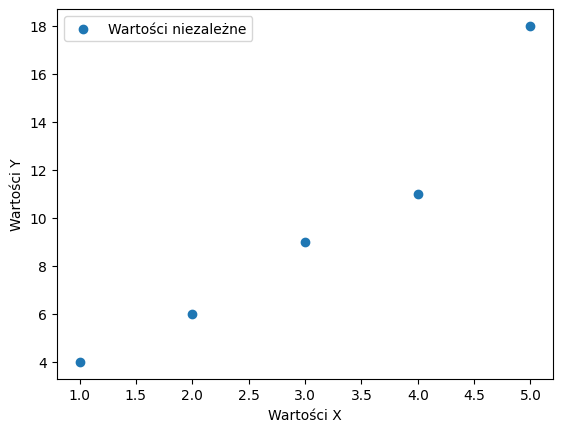

In [2]:
df = pd.DataFrame()
df['X'] = [1, 2, 3, 4, 5]
df['Y'] = [4, 6, 9, 11, 18]

print(df)
plt.scatter(df['X'], df['Y'], label="Wartości niezależne")
plt.xlabel("Wartości X")
plt.ylabel("Wartości Y")
plt.legend()
plt.show()

In [3]:
srednia_x = srednia(df['X'])
srednia_y = srednia(df['Y'])

print(f'Srednia X: {srednia_x},\nsrednia Y: {srednia_y}.', end='\n\n')

odchylenie_standardowe_x = odchylenie_standardowe(df['X'])
odchylenie_standardowe_y = odchylenie_standardowe(df['Y'])

print(f'Odchylenie std X: {odchylenie_standardowe_x},\nodchylenie std Y: {odchylenie_standardowe_y}.\n')

iloczyn_odchylen_std = odchylenie_standardowe_x * odchylenie_standardowe_y
cov = kowariancja(df['X'], df['Y'])
wspolczynnik_korelacji = cov/iloczyn_odchylen_std
print(f'Wspolczynnik korelacji Pearsona: {wspolczynnik_korelacji}.')

Srednia X: 3.0,
srednia Y: 9.6.

Odchylenie std X: 1.4142135623730951,
odchylenie std Y: 4.841487374764082.

Wspolczynnik korelacji Pearsona: 0.9639402924310271.


In [4]:
b = wspolczynnik_korelacji * (odchylenie_standardowe_y/odchylenie_standardowe_x)
a = srednia_y - b * srednia_x
print(f'Otrzymana funkcja liniowa:\ny = {b} * x - ({a})')

Otrzymana funkcja liniowa:
y = 3.3000000000000003 * x - (-0.3000000000000007)


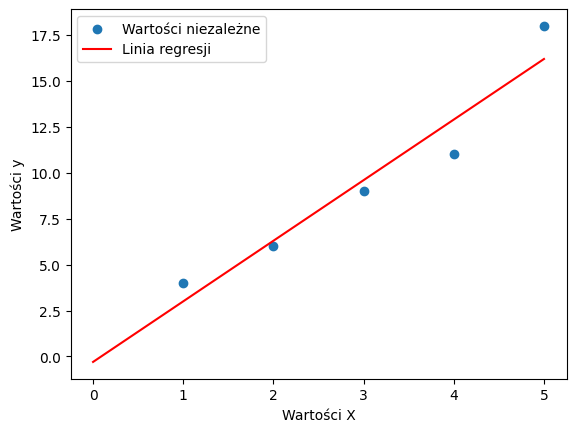

In [5]:
def funkcja_regresji(x: np.ndarray) -> np.ndarray:
    return (b * x) + a

x = np.linspace(0, 5, 1000)
plt.scatter(df['X'], df['Y'], label='Wartości niezależne')
plt.plot(x, funkcja_regresji(x), 'r', label='Linia regresji')
plt.xlabel('Wartości X')
plt.ylabel('Wartości y')
plt.legend()
plt.show()

In [6]:
df['X'] = [1, 2, 3, 4, 5]
df['Y'] = [4, 6, 9, 11, 18]

df_dolaczana = pd.DataFrame()
df_dolaczana['X'] = [6]
df_dolaczana['Y'] = [np.nan]
df = pd.concat([df, df_dolaczana], ignore_index=True)
df

,X,Y
0,1,4.0
1,2,6.0
2,3,9.0
3,4,11.0
4,5,18.0
5,6,NaN


In [7]:
def przewidywanie_y(x: np.ndarray, b: (int | float), a: (int | float)) -> np.ndarray:
    return b * x + a

df.at[5, 'Y'] = przewidywanie_y(df['X'][5], b, a)
df

,X,Y
0,1,4.0
1,2,6.0
2,3,9.0
3,4,11.0
4,5,18.0
5,6,19.5


<center><h2>Przewidywanie X=7</h2></center>

In [8]:
df_dolaczana = pd.DataFrame()
df_dolaczana['X'] = [7]
df_dolaczana['Y'] = [np.nan]
df = pd.concat([df, df_dolaczana], ignore_index=True)
print(df)

df.at[6, 'Y'] = przewidywanie_y(df['X'][6], b, a)
df

   X     Y
0  1   4.0
1  2   6.0
2  3   9.0
3  4  11.0
4  5  18.0
5  6  19.5
6  7   NaN


,X,Y
0,1,4.0
1,2,6.0
2,3,9.0
3,4,11.0
4,5,18.0
5,6,19.5
6,7,22.8


<center><h2>Przewidywanie X=8</h2></center>

In [9]:
df_dolaczana = pd.DataFrame()
df_dolaczana['X'] = [8]
df_dolaczana['Y'] = [np.nan]
df = pd.concat([df, df_dolaczana], ignore_index=True)
print(df)

df.at[7, 'Y'] = przewidywanie_y(df['X'][7], b, a)
df


   X     Y
0  1   4.0
1  2   6.0
2  3   9.0
3  4  11.0
4  5  18.0
5  6  19.5
6  7  22.8
7  8   NaN


,X,Y
0,1,4.0
1,2,6.0
2,3,9.0
3,4,11.0
4,5,18.0
5,6,19.5
6,7,22.8
7,8,26.1


<center><h2>Linia regresji dla przewidzianych X=7 & X=8</h2></center>

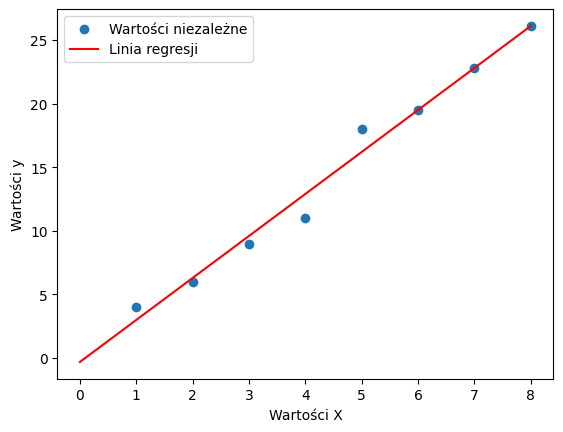

In [10]:
srednia_x = srednia(df['X'])
srednia_y = srednia(df['Y'])
odchylenie_standardowe_x = odchylenie_standardowe(df['X'])
odchylenie_standardowe_y = odchylenie_standardowe(df['Y'])
iloczyn_odchylen_std = odchylenie_standardowe_x * odchylenie_standardowe_y
cov = kowariancja(df['X'], df['Y'])
wspolczynnik_korelacji = cov/iloczyn_odchylen_std
b = wspolczynnik_korelacji * (odchylenie_standardowe_y/odchylenie_standardowe_x)
a = srednia_y - b * srednia_x

x = np.linspace(0, 8, 1000)
plt.scatter(df['X'], df['Y'], label='Wartości niezależne')
plt.plot(x, funkcja_regresji(x), 'r', label='Linia regresji')
plt.xlabel('Wartości X')
plt.ylabel('Wartości y')
plt.legend()
plt.show()